In [40]:
import numpy
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2
import imageio
import io

In [12]:
length = 10             # length of rod in metres
k = 0.89                # specific heat (for aluminium)

# defining boundary conidtions
temp_left = 100         # temperature of left end source
temp_right = 200        # temperature of right end source

total_sim_time = 10     # total simulation time

In [13]:
dx = 0.1                # 0.1 m = 10 cm
x_vector = numpy.linspace(0, length, int(length/dx))

In [14]:
x_vector    # denotes the rod divided into small pieces of equal length

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [15]:
dt = 0.0001
t_vector = numpy.linspace(0, total_sim_time, int(total_sim_time/dt))

In [16]:
t_vector     # detones time divided into small equal intervals

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [17]:
# initial conditions
u = numpy.zeros([len(t_vector),len(x_vector)])

In [18]:
u.shape

(100000, 100)

In [19]:
u

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Each row denotes the vector of temperatures at time t
and each column or a value in vector denotes the temperature at x

for example: u[0,3] is temperature at x=3 and t=0

In [20]:
# initializing boundary conditions
u[:,0] = temp_left
u[:,-1] = temp_right

In [21]:
u

array([[100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       ...,
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.]])

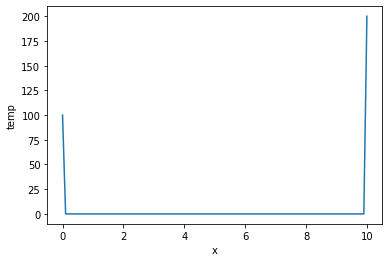

In [22]:
plt.plot(x_vector,u[0])
plt.ylabel("temp")
plt.xlabel("x")
plt.show()

In [26]:
for t in range(1,len(t_vector)-1):
    for x in range(1,len(x_vector)-1):
        u[t+1,x] = k*dt*((u[t,x+1] - 2*u[t,x] + u[t,x-1])/dx**2) + u[t,x]

In [27]:
u

array([[100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.89      ,   0.        , ...,   0.        ,
          1.78      , 200.        ],
       ...,
       [100.        ,  98.59123721,  97.1847561 , ..., 192.92058415,
        196.4589255 , 200.        ],
       [100.        ,  98.59125751,  97.1847967 , ..., 192.92063276,
        196.45894983, 200.        ],
       [100.        ,  98.59127782,  97.1848373 , ..., 192.92068138,
        196.45897415, 200.        ]])

In [43]:
def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = numpy.frombuffer(buf.getvalue(), dtype=numpy.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

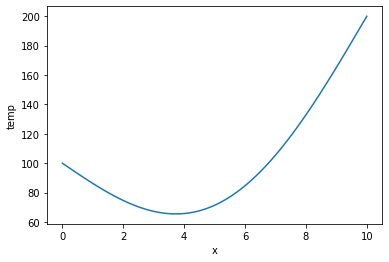

In [45]:
images = []
for i in range(0,u.shape[0],1000):
    fig = plt.figure()
    plt.plot(x_vector,u[i])
    plt.ylabel("temp")
    plt.xlabel("x")
    plt.show()
    images.append(get_img_from_fig(fig))
    clear_output(wait=True)

In [46]:
imageio.mimsave('sim_1D_heat_FDM.gif', images)